# Importing the Data

In [9]:
# Importing basic Libraries for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', 10)

In [10]:
df = pd.read_csv('Data/combined_df.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51199 entries, 0 to 51198
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Head          51104 non-null  object
 1   Body          50902 non-null  object
 2   Tags          50888 non-null  object
 3   First Answer  25555 non-null  object
dtypes: object(4)
memory usage: 1.6+ MB


In [12]:
df.describe()

,Head,Body,Tags,First Answer
count,51104,50902,50888,25555
unique,48978,48809,37079,24429
top,R's lmer cheat sheet,\nThere's a lot of discussion going on on this...,['data-request'],What's the difference between (~1 +....) and (...
freq,5,5,357,5


In [13]:
df.isna().sum()

Head               95
Body              297
Tags              311
First Answer    25644
dtype: int64

* We can see that the are some missing values in the dataset. First Answer features have 50% missing values.
* Without taking this column into consideration, we can see that there are 3 columns with missing values. now we will clean those features.

<Axes: >

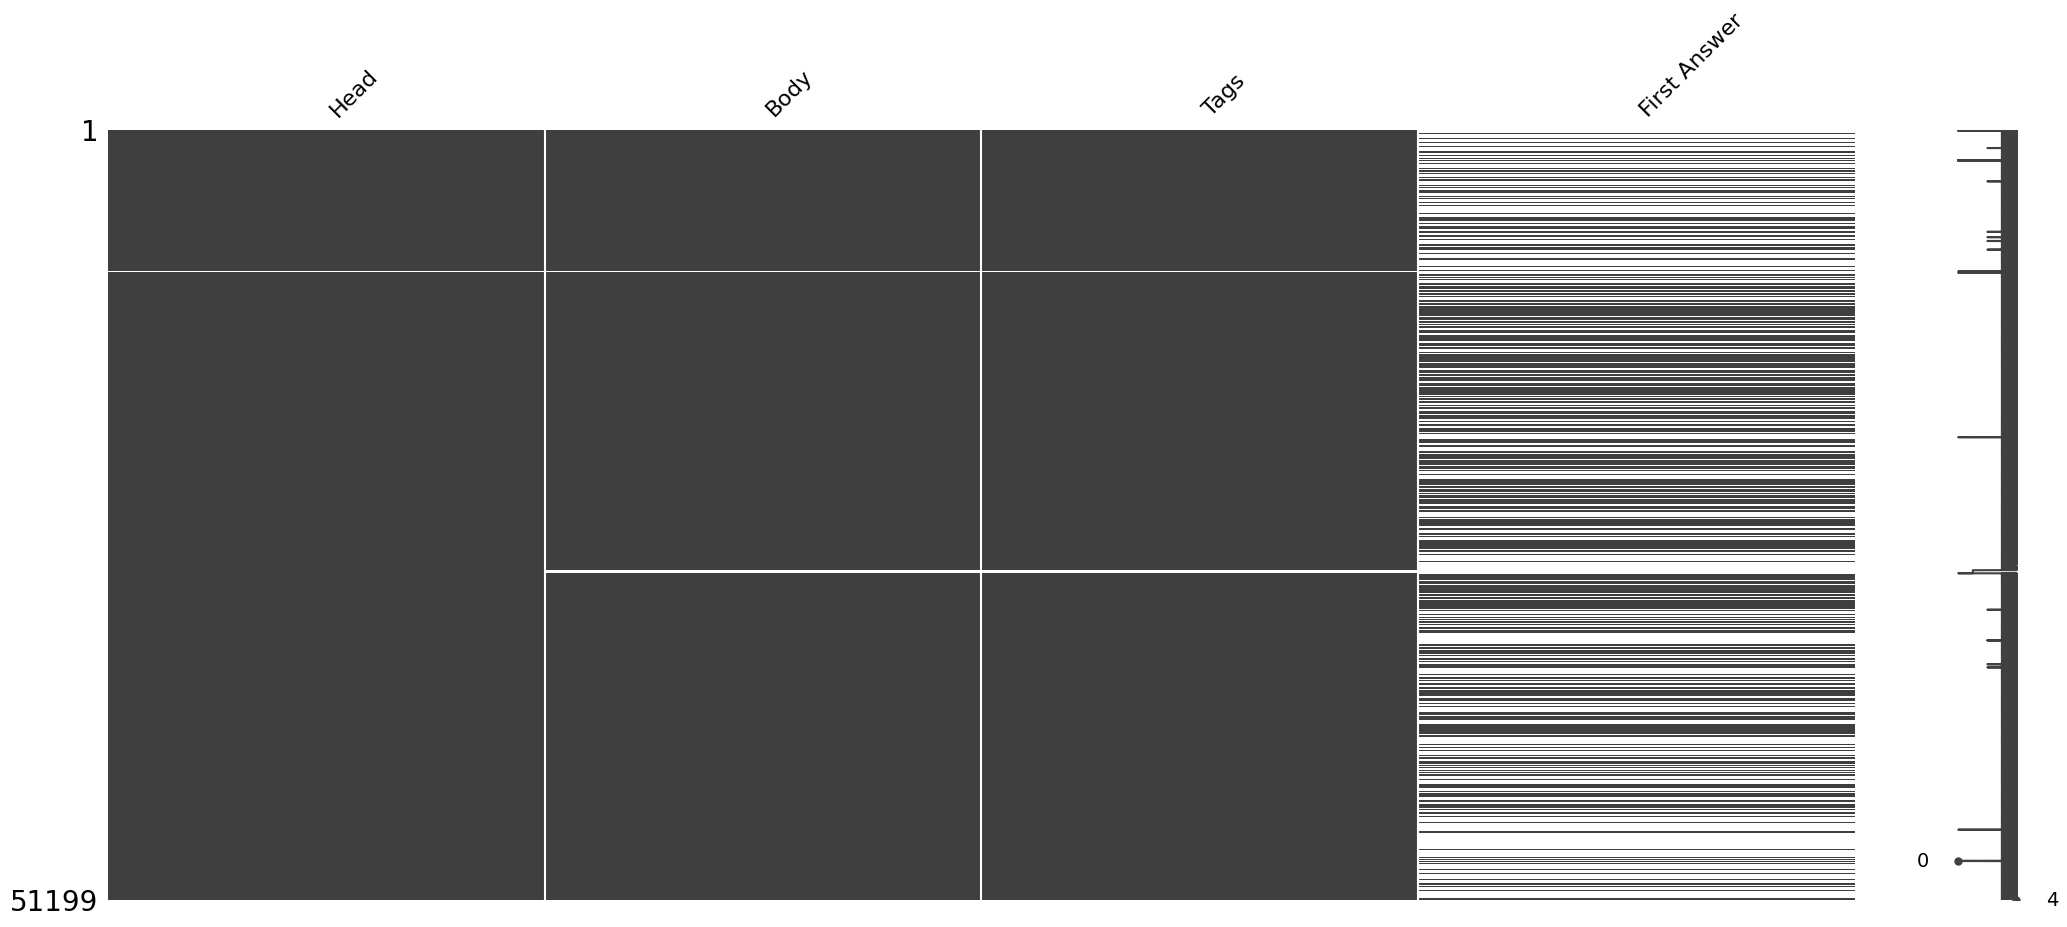

In [14]:
msno.matrix(df)

- We can se from the missing values distribution that both body and tags are common in the missing values.
- If we can drop these rows, we can get rid of most of the missing values without hampering the quality of the data, because we are doing a supervised learning task and we need the tags to be present.

<Axes: >

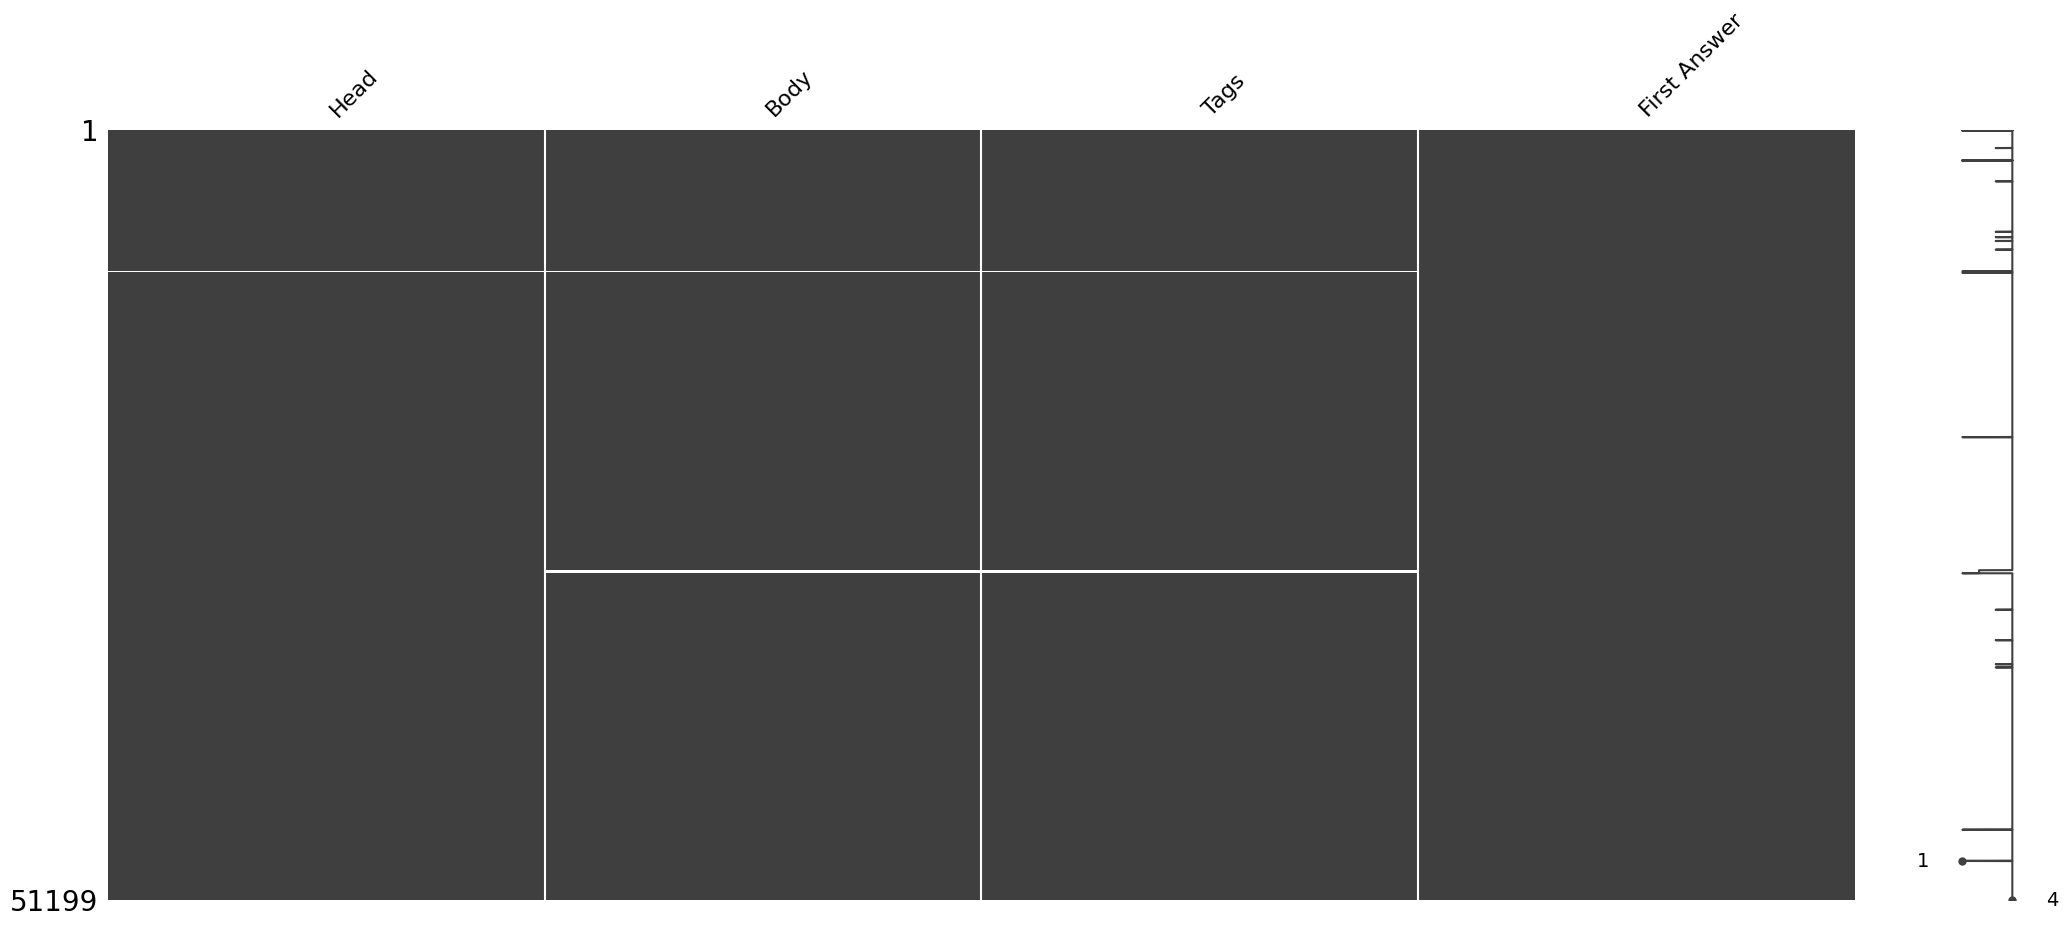

In [15]:
df['First Answer'].fillna('No Answer', inplace=True)
msno.matrix(df)


<Axes: >

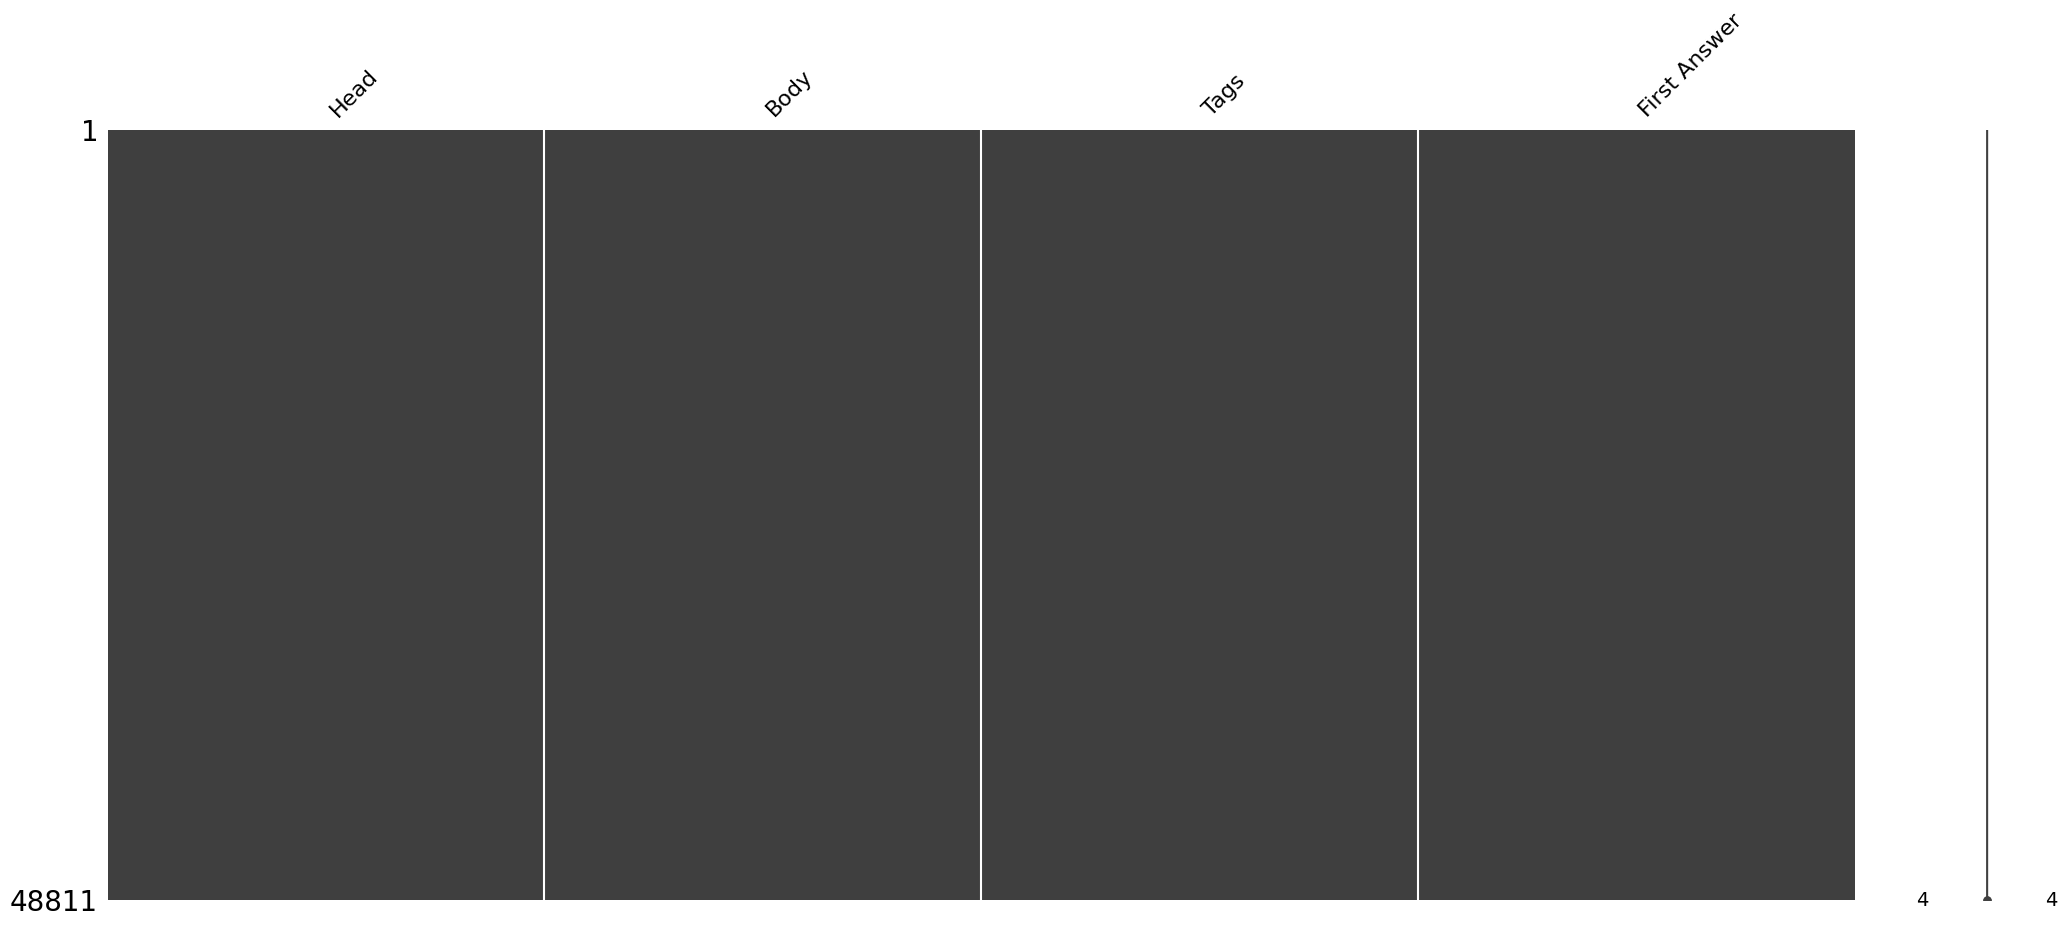

In [17]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
msno.matrix(df)

* ### Now our data is in a good shape, we can start to do some analysis on it.

In [46]:
# Saving the cleaned data to a csv file

df.to_csv('Data/cleaned_data_part1.csv', index=False)